In [15]:
%matplotlib inline

import os
import tensorflow as tf
import torch
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt

In [2]:
def parse_eventfiles(summary_dir): 
    step_acc_list = []
    for filename in os.listdir(summary_dir):
        sum_iter =  summary_iterator(os.path.join(summary_dir,filename))
        for summ in sum_iter:
            if summ.HasField('summary'):
                if summ.summary.value[0].tag == 'test/accuracy':
                    step_acc_list.append((summ.step,(tf.make_ndarray(summ.summary.value[0].tensor) * 100)))

                    
    return sorted(step_acc_list, key=lambda x: x[0])

In [3]:
cd /projectnb/ivc-ml/piotrt/gradmax/growneuron/jupyter_analysis


/projectnb/ivc-ml/piotrt/gradmax/growneuron/jupyter_analysis


In [4]:
acc_gradmax = list(zip(*parse_eventfiles('../outputs/cifar/24570_single/gm_gradmax_cifar/summaries/')))[1]
acc_firefly = list(zip(*parse_eventfiles('../outputs/cifar/24570_single/gm_firefly_cifar/summaries/')))[1]
acc_random = list(zip(*parse_eventfiles('../outputs/cifar/24570_single/gm_random_cifar/summaries/')))[1]

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [5]:
acc_random

(16.266025602817535,
 23.67788404226303,
 22.04527258872986,
 37.12940812110901,
 38.52163553237915,
 39.11257982254028,
 40.334534645080566,
 46.35416567325592,
 48.58773946762085,
 44.821715354919434,
 50.661057233810425,
 51.82291865348816,
 48.15705120563507,
 47.86658585071564,
 53.23517918586731,
 54.5973539352417,
 55.83934187889099,
 55.69911599159241,
 54.85777258872986,
 54.957932233810425,
 49.338942766189575,
 54.74759340286255,
 56.99118375778198,
 58.774036169052124,
 59.35496687889099,
 60.60696840286255,
 56.88101053237915,
 59.74559187889099,
 60.46674847602844,
 57.23156929016113,
 61.24799847602844,
 58.96434187889099,
 60.95753312110901,
 61.708736419677734,
 54.787659645080566,
 57.10136294364929,
 64.10256624221802,
 63.661861419677734,
 63.571715354919434,
 62.84054517745972,
 65.05408883094788,
 64.85376358032227,
 55.92948794364929,
 54.196715354919434,
 64.88381624221802,
 65.95553159713745,
 63.98237347602844,
 65.7151460647583,
 62.96073794364929,
 67.528045

In [6]:
cd /projectnb/ivc-ml/chaupham/anytime/param_share/incremental_training/

/projectnb/ivc-ml/chaupham/anytime/param_share/incremental_training


In [8]:
ls snapshots/

A/
__cifar100_full_ens_28bins/
__cifar100_ours_slim_depth_28bins/
__cifar100_ours_slim_mix_28bins/
__cifar100_ours_slim_mix_29bins/
baseline-c100-large-amp-ffcv/
baseline-c100-large-amp-ffcv-2/
baseline-c100-large-noamp-ffcv/
baseline-c100-small-amp-ffcv/
baseline-c100-small-noamp-ffcv/
baseline-imagenet-big/
baseline-imagenet-big-1/
baseline-imagenet-fullensemble/
baseline-imagenet-fullensemble-1/
baseline-imagenet-gradmax-halfseed/
baseline-imagenet-gradmax-halfseed-nogminit/
baseline-imagenet-randinit/
baseline-imagenet-randinit-1/
baseline-imagenet-small/
baselinestd-nogrow-ens2of-28-2/
cifar100_full_ens_29bins_2students/
cifar100_ours_ens_bank_size_8_v2/
cifar100_ours_ens_bank_size_8_v2_grow_18/
cifar100_ours_ens_bank_size_8_v2_grow_28/
cifar100_ours_ens_bank_size_8_v2_grow_38/
cifar100_ours_ens_bank_size_8_v2_grow_49/
cifar100_ours_ens_bank_size_8_v2_grow_63/
cifar100_ours_slim_mix_29bins/
cifar100_ours_v2/
cifar100_ours_v2_grow_18/
cifar100_ours_v2_grow_28/
cifar100_ours_v2_grow

In [50]:
#checkpoint = torch.load('/projectnb/ivc-ml/chaupham/anytime/param_share/incremental_training/snapshots/cifar100_ours_slim_depth/checkpoint.pth.tar', map_location=torch.device('cpu'))
#acc_ours = checkpoint['recorder'].epoch_accuracy[:,1]

In [26]:
checkpoint = torch.load('/projectnb/ivc-ml/chaupham/anytime/param_share/incremental_training/snapshots/cifar100_ours_slim_mix_29bins/checkpoint.pth.tar', map_location=torch.device('cpu'))
acc_ours = checkpoint['recorder'].epoch_accuracy[:,1]

In [27]:
acc_ours

array([14.9 , 23.37, 29.55, 36.78, 41.59, 43.97, 47.47, 46.14, 49.  ,
       49.3 , 51.23, 56.92, 53.16, 55.23, 55.39, 54.06, 60.09, 58.38,
       58.47, 52.42, 60.67, 61.92, 53.96, 61.94, 56.24, 59.66, 62.02,
       62.19, 64.89, 62.51, 60.51, 61.23, 64.01, 61.8 , 62.65, 64.39,
       63.65, 64.95, 66.05, 64.06, 64.13, 65.15, 65.02, 66.5 , 66.52,
       63.95, 64.89, 66.32, 67.36, 66.59, 67.76, 67.7 , 66.13, 68.63,
       66.34, 68.87, 69.93, 68.32, 70.02, 68.59, 70.51, 70.72, 70.72,
       71.1 , 70.64, 71.8 , 72.33, 71.98, 72.44, 72.94, 73.05, 73.82,
       74.02, 75.77, 76.33, 76.31, 76.94, 77.07, 76.93, 77.26, 77.65,
       77.69, 77.5 , 77.52, 77.63, 77.85, 77.93, 78.06, 77.91, 77.85,
       77.92, 77.91, 77.94, 77.84, 78.  , 77.88, 77.9 , 77.91, 77.91,
       78.03], dtype=float32)

In [23]:
x = list(range(1,101))

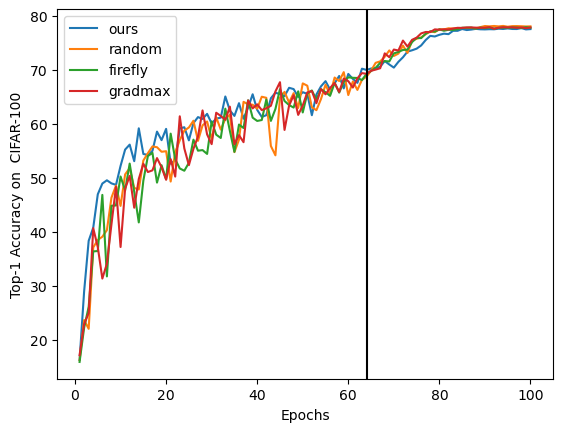

In [24]:
plt.plot(x,acc_ours, label='ours')
plt.plot(x, acc_random, label='random')
plt.plot(x, acc_firefly, label='firefly')
plt.plot(x, acc_gradmax, label='gradmax')
plt.axvline(64, color='black')
plt.xlabel('Epochs')
plt.ylabel('Top-1 Accuracy on  CIFAR-100')
plt.legend()
plt.savefig('/projectnb/ivc-ml/piotrt/gradmax/growneuron/jupyter_analysis/Fig1.pdf')

In [13]:
plt.show()
